# Problem : Build a model which can predict the quality of wine based on the proportion of its constituents.

### I have solved the problem using following models

#### Decision tree
#### Random forest

### Importing modules

In [1]:
%matplotlib inline
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen


import warnings                               
warnings.filterwarnings('ignore')              

### Importing the csv file

In [2]:
df = pd.read_csv('QualityPrediction.csv')

# Exploratory data analysis

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Checking for number of rows & columns
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Five-Point-summary for all columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Checking for unique values of target variable(quality)
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
# Breakdown of target variable into categories
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

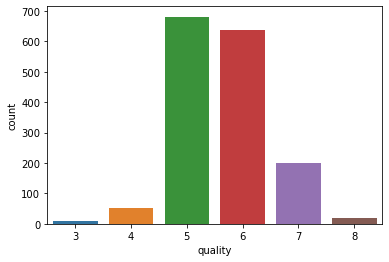

In [10]:
# Distribution of data based on different classes of target variable
sns.countplot(x='quality', data = df)

### It is clearly visible that the dataset is biased towards the quality 5,6 &7
### Since it is a small dataset...we cant take uniform samples for all categories of 'quality'
### To solve this problem we will convert the multi-classification problem to di-classification through binning

## Visualising the relation of each variable with the target variable.
## Visualising the distribution of each variable.
## Extracting and removing the extreme outliers,
## through IQR method and z-score method

### alcohol

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

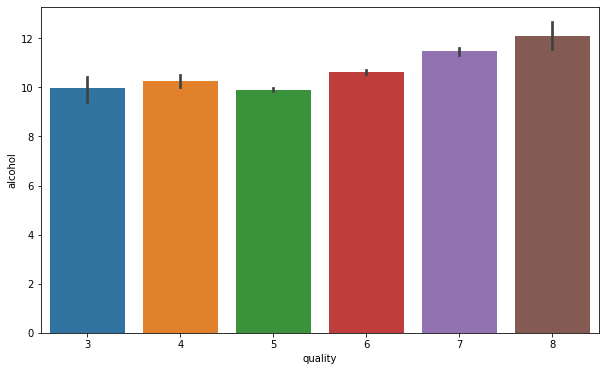

In [11]:
#Alcohol level goes higher as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

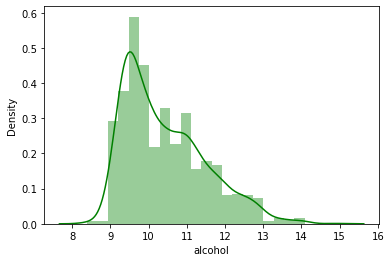

In [12]:

sns.distplot(df['alcohol'],color = 'green');

<AxesSubplot:>

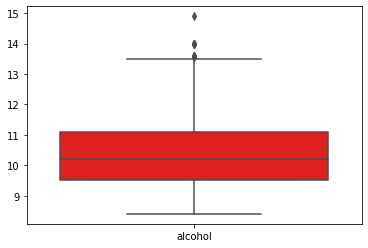

In [13]:
sns.boxplot(data = df.loc[:,['alcohol']],color = 'red',)

In [14]:
# Extracting & removing outliers from 'alcohol' column
ol_rows1=[]
for i in df.index:
    if df['alcohol'][i]>13.0:
        ol_rows1.append(i)

df.drop(index=ol_rows1,inplace=True)


### residual sugar

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

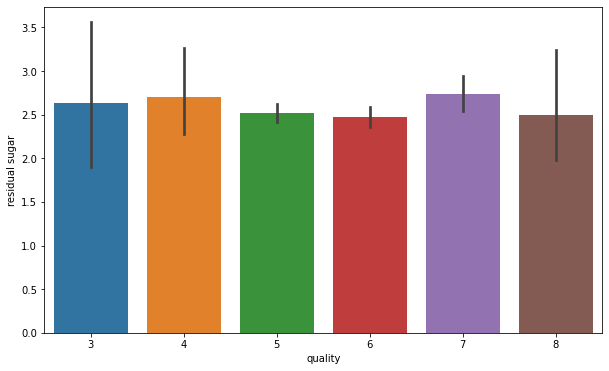

In [15]:
# Here we see that residual sugar does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

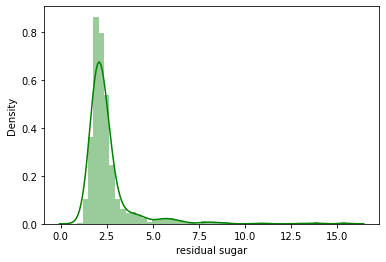

In [16]:
sns.distplot(df['residual sugar'],color = 'green',);

<AxesSubplot:>

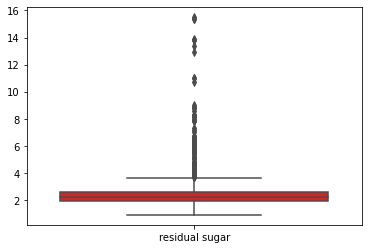

In [17]:
sns.boxplot(data = df.loc[:,['residual sugar']],color = 'red')

In [18]:
# Extracting & removing outliers from 'residual sugar' column
ol_rows2=[]
for i in df.index:
    if df['residual sugar'][i]>6.0:
        ol_rows2.append(i)
#print(ol_rows2)

df.drop(index=ol_rows2,inplace=True)

### fixed acidity

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

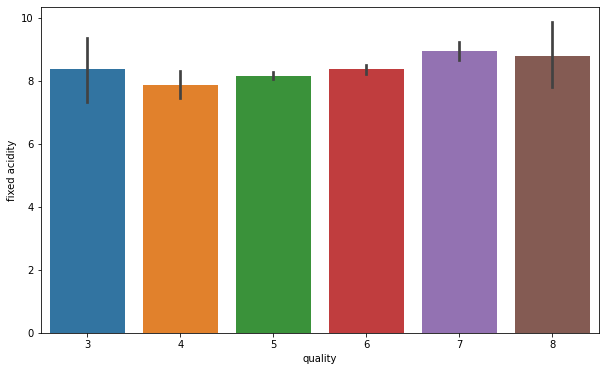

In [19]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

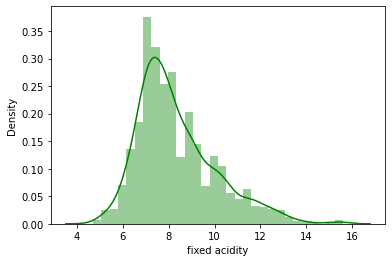

In [20]:
sns.distplot(df['fixed acidity'],color = 'green');

<AxesSubplot:>

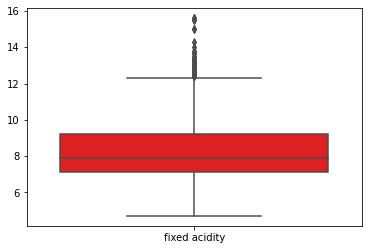

In [21]:
sns.boxplot(data = df.loc[:,['fixed acidity']],color = 'red')

In [22]:
# Extracting & removing outliers from 'fixed acidity' column
ol_rows2=[]
for i in df.index:
    if df['fixed acidity'][i]>13.0:
        ol_rows2.append(i)
#print(ol_rows2)

df.drop(index=ol_rows2,inplace=True)

### volatile acidity

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

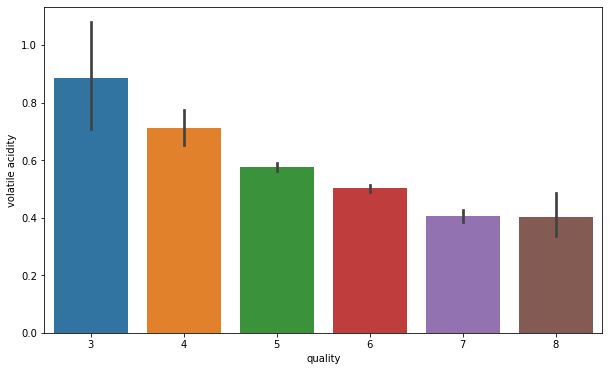

In [23]:
#Here we see that its quite a decreasing trend in the volatile acidity as we increase the quality
#Volatile acidity & quality have negative correlation
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

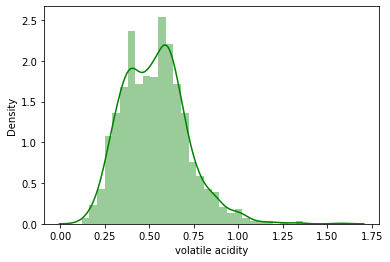

In [24]:
sns.distplot(df['volatile acidity'],color = 'green');

<AxesSubplot:>

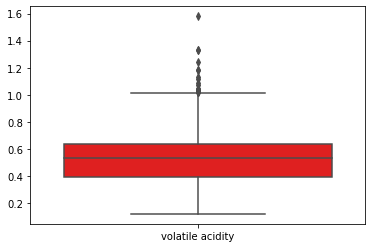

In [25]:
sns.boxplot(data = df.loc[:,['volatile acidity']],color = 'red')

In [26]:
# Extracting & removing outliers from 'volatile acidity' column
ol_rows2=[]
for i in df.index:
    if df['volatile acidity'][i]>1.0:
        ol_rows2.append(i)
#print(ol_rows2)

df.drop(index=ol_rows2,inplace=True)

### citric acid

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

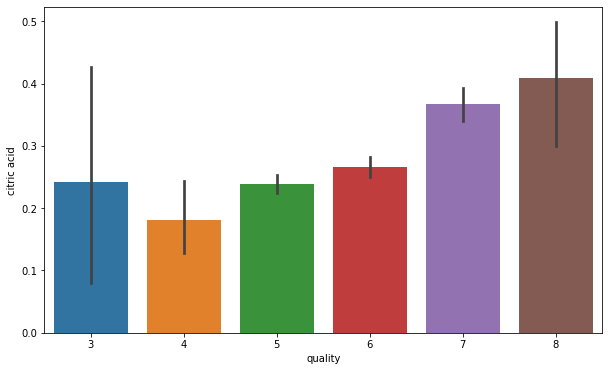

In [27]:
# Citric acid has positive correlation with quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

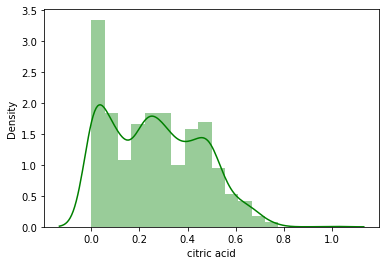

In [28]:
sns.distplot(df['citric acid'],color = 'green');

<AxesSubplot:>

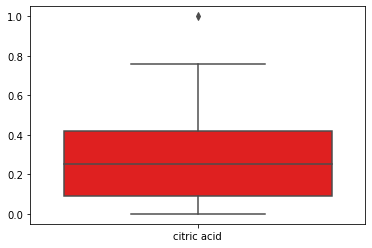

In [29]:
sns.boxplot(data = df.loc[:,['citric acid']],color = 'red')

In [30]:
# Extracting & removing outliers from 'fixed acidity' column
ol_rows2=[]
for i in df.index:
    if df['citric acid'][i]>0.8:
        ol_rows2.append(i)
#print(ol_rows2)

df.drop(index=ol_rows2,inplace=True)

### chlorides

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

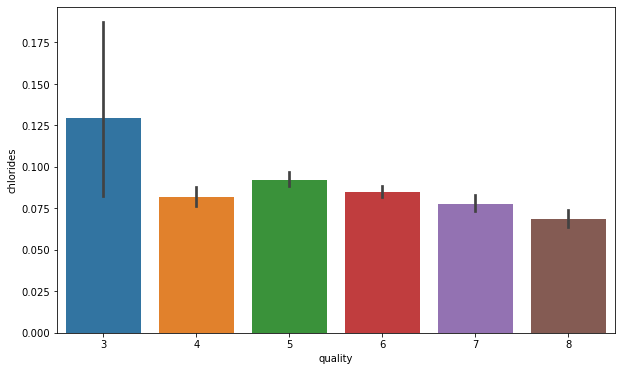

In [31]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

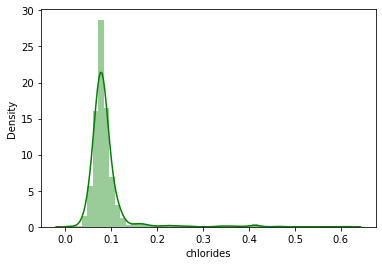

In [32]:
sns.distplot(df['chlorides'],color = 'green');

<AxesSubplot:>

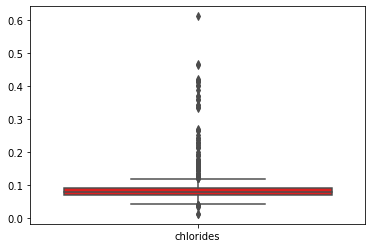

In [33]:
sns.boxplot(data = df.loc[:,['chlorides']],color = 'red')

In [34]:
# Extracting & removing outliers from 'chlorides' column
ol_rows2=[]
for i in df.index:
    if (df['chlorides'][i]>0.2)|(df['chlorides'][i]<0.05):
        ol_rows2.append(i)
#print(ol_rows2)

df.drop(index=ol_rows2,inplace=True)

### free sulfur dioxide

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

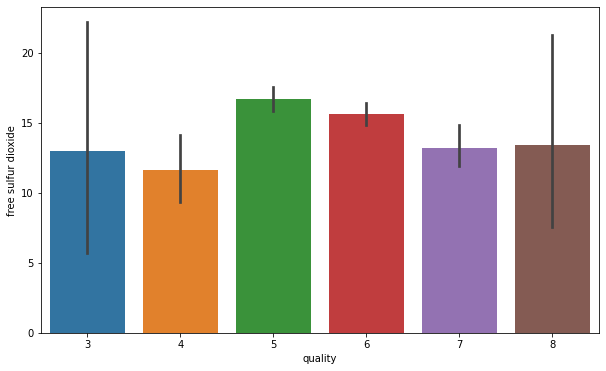

In [35]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

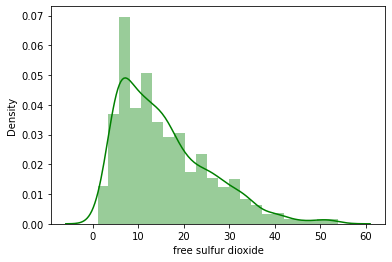

In [36]:
sns.distplot(df['free sulfur dioxide'],color = 'green');

<AxesSubplot:>

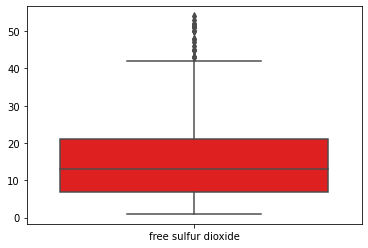

In [37]:
sns.boxplot(data = df.loc[:,['free sulfur dioxide']],color = 'red')

In [38]:
# Extracting & removing outliers from 'free sulfur dioxide' column
ol_rows2=[]
for i in df.index:
    if df['free sulfur dioxide'][i]>40.0:
        ol_rows2.append(i)
#print(ol_rows2)

df.drop(index=ol_rows2,inplace=True)

### total sulfur dioxide

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

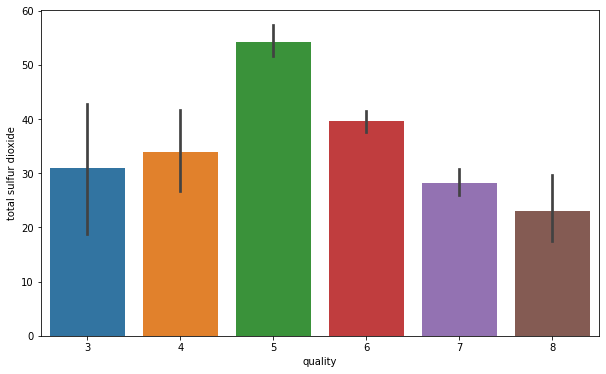

In [39]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

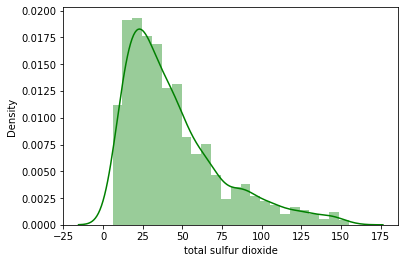

In [40]:
sns.distplot(df['total sulfur dioxide'],color = 'green');

<AxesSubplot:>

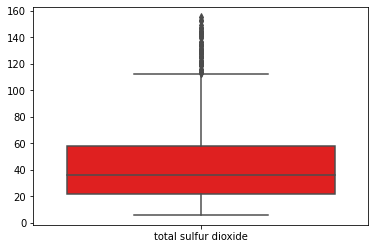

In [41]:
sns.boxplot(data = df.loc[:,['total sulfur dioxide']],color = 'red')

In [42]:
# Extracting & removing outliers from 'total sulfur dioxide' column
ol_rows2=[]
for i in df.index:
    if df['total sulfur dioxide'][i]>125.0:
        ol_rows2.append(i)
#print(ol_rows2)

df.drop(index=ol_rows2,inplace=True)

### density

<AxesSubplot:xlabel='quality', ylabel='density'>

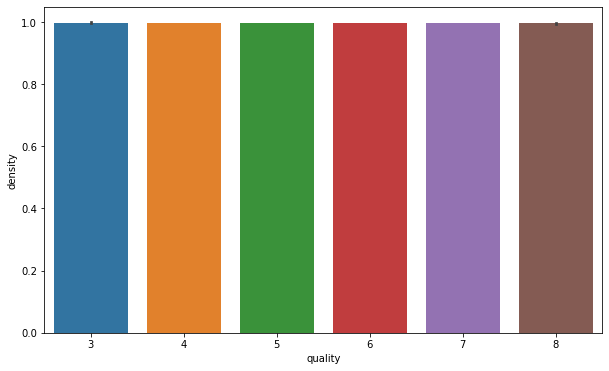

In [43]:
# Mean value of density is same for all qualities
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = df)

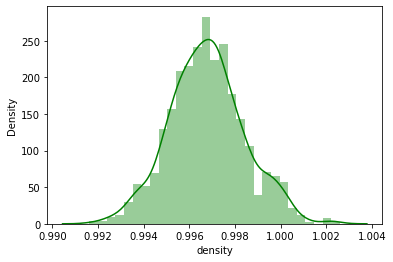

In [44]:
sns.distplot(df['density'],color = 'green');

<AxesSubplot:>

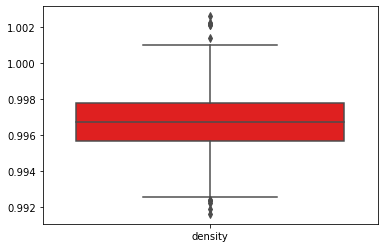

In [45]:
sns.boxplot(data = df.loc[:,['density']],color = 'red')

In [46]:
# Extracting & removing outliers from 'density' column
ol_rows2=[]
for i in df.index:
    if df['density'][i]>1.001:
        ol_rows2.append(i)
#print(ol_rows2)

df.drop(index=ol_rows2,inplace=True)

### pH

<AxesSubplot:xlabel='quality', ylabel='pH'>

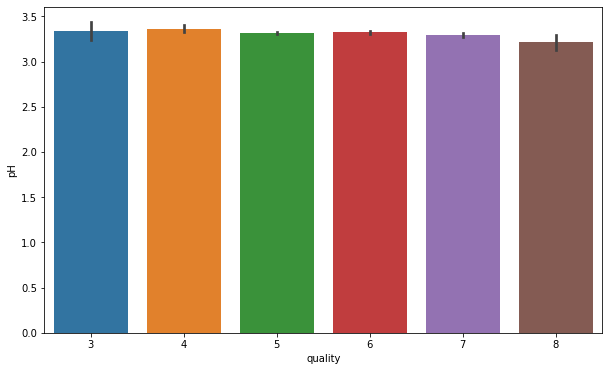

In [47]:
# Mean value of pH is almost same for all qualities
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df)

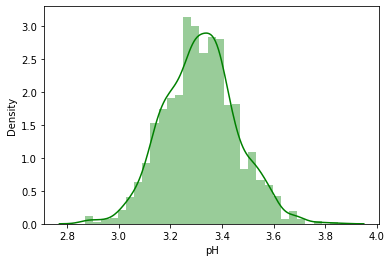

In [48]:
sns.distplot(df['pH'],color = 'green');

<AxesSubplot:>

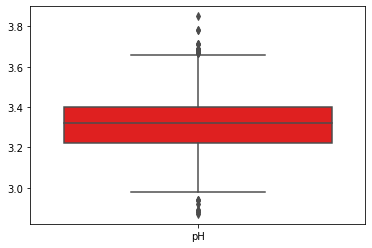

In [49]:
sns.boxplot(data = df.loc[:,['pH']],color = 'red')

In [50]:
# Extracting & removing outliers from 'pH' column
ol_rows2=[]
for i in df.index:
    if (df['pH'][i]>3.65)| (df['pH'][i]<3.0):
        ol_rows2.append(i)
#print(ol_rows2)

df.drop(index=ol_rows2,inplace=True)

### sulphates

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

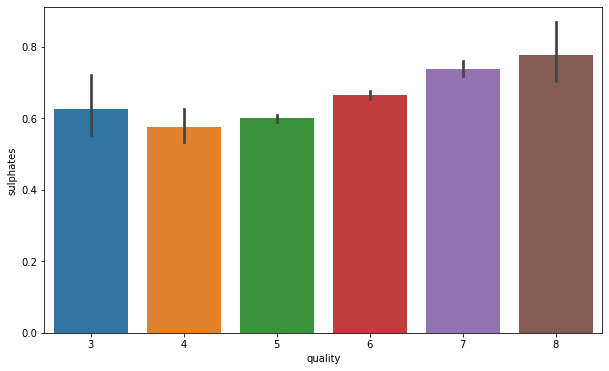

In [51]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

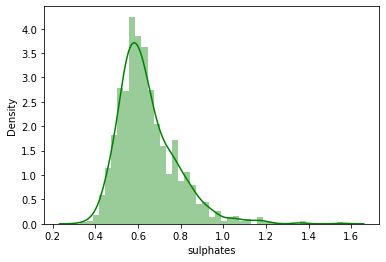

In [52]:
sns.distplot(df['sulphates'],color = 'green');

<AxesSubplot:>

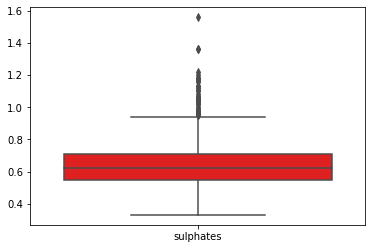

In [53]:
sns.boxplot(data = df.loc[:,['sulphates']],color = 'red')

In [54]:
# Extracting & removing outliers from 'sulphates' column
ol_rows2=[]
for i in df.index:
    if df['sulphates'][i]>1.0:
        ol_rows2.append(i)
#print(ol_rows2)

df.drop(index=ol_rows2,inplace=True)

In [55]:
# New shape of data_frame after removing outliers from all the columns
df.shape

(1282, 12)

## Cross checking for more outliers through z-score method

In [56]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.56524479 1.06277783 1.3630162  ... 0.61969282 1.00536641 0.81514183]
 [0.30914165 2.15792212 1.3630162  ... 0.39839286 0.58699518 0.81514183]
 [0.30914165 1.42782593 1.14966006 ... 0.14387144 0.58699518 0.81514183]
 ...
 [1.26952841 0.09320781 0.66960875 ... 0.99227618 0.66811851 0.47499623]
 [1.52563154 0.72815041 0.72294778 ... 0.65291428 0.16862395 0.81514183]
 [1.46160576 1.3100348  1.14391842 ... 0.22871192 0.66811851 0.47499623]]


In [57]:
threshold = 3
print(np.where(z > 3))

(array([  27,   30,   31,   51,   52,   99,  161,  161,  207,  215,  218,
        233,  262,  284,  313,  318,  320,  355,  363,  372,  380,  382,
        388,  394,  394,  413,  421,  425,  426,  428,  460,  475,  476,
        486,  492,  523,  524,  592,  593,  597,  618,  637,  641,  641,
        642,  684,  703,  704,  711,  714,  733,  738,  766,  788,  842,
        859,  866,  868,  879,  896,  908,  929,  940,  941,  943,  952,
        953, 1000, 1061, 1122, 1127, 1145, 1146, 1150, 1154, 1158, 1177,
       1181, 1181, 1200, 1241, 1262], dtype=int64), array([ 3,  3,  3,  3,  3,  4,  3,  6, 11,  3,  3,  4,  9,  4,  4,  6,  6,
       11,  0, 11, 11, 11,  3,  4, 11,  3,  4,  3,  3,  6,  3,  3,  3,  4,
        3,  6,  6,  4,  4,  4,  4, 11,  4, 11,  4,  4,  3,  3,  3,  4,  3,
        9,  3,  7, 11,  3,  3,  3,  4,  3,  4,  3,  3,  4,  4, 11,  3,  3,
        4,  3,  3,  4,  3,  3,  3, 11, 11,  3, 11, 11, 11,  3],
      dtype=int64))


In [58]:
df_new = df[(z < 3).all(axis=1)]


In [59]:
# Before Z-score methods
df.shape

(1282, 12)

In [60]:
# After Z-score method
df_new.shape

(1204, 12)

## 'density' & 'pH' columns have very low variance
## Can be seen from SD value & plot betn respective columns & quality

## Dropping these columns

In [61]:
del df_new['density']

In [62]:
del df_new['pH']

In [63]:
df_new.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.68,9.8,5


#### df_new will be the data set on which we will be implementing our models.

In [64]:
df_new.quality.value_counts()

5    517
6    511
7    138
4     38
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

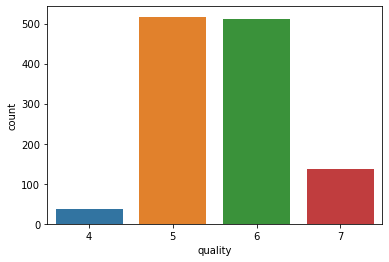

In [65]:
# New distribution of classes
sns.countplot(x='quality', data = df_new)

# correlation matrix


<AxesSubplot:>

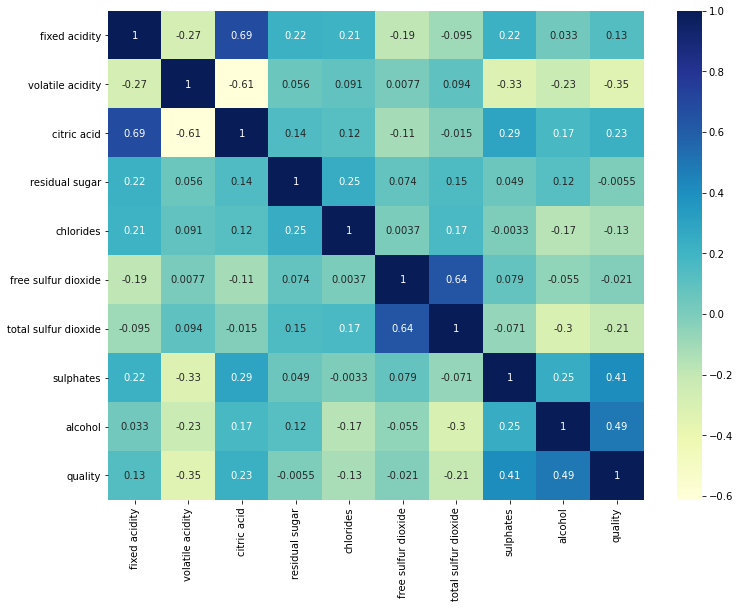

In [66]:
plt.subplots(figsize=(12, 9))
sns.heatmap(df_new.corr(),cmap='YlGnBu',annot=True)


## Some of the independent columns are correlated with each other
## But still correlation coeff. are not higher than 0.7 for any pair
## So its not a much concern

### To decrease the effect of biased dataset, converting the problem to Bi-classification
### Making binary classificaion for the response variable.
### Dividing wine as 'good ---> 1' and 'not good ----> 0' 

In [67]:
bins = (3,5,8)
group_names = [0, 1]
df_new['quality'] = pd.cut(df_new['quality'], bins=bins, labels=group_names)

In [68]:
df_new['quality'].value_counts()

1    649
0    555
Name: quality, dtype: int64

In [69]:
df_new['quality'].head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: category
Categories (2, int64): [0 < 1]

### Extracting independent variables

In [70]:
X = df_new.drop('quality', axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4


### Extracting target variable

In [71]:
Y = df_new['quality']
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: category
Categories (2, int64): [0 < 1]

### Train Test Split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

### Scaling the data

In [73]:
standard_Scaler=StandardScaler()                      
x_train = standard_Scaler.fit_transform(x_train)      
x_test = standard_Scaler.transform(x_test) 

In [74]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Model_1
# Decision_Tree

### Decision Tree with depth = 8

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
model_dt_8 = DecisionTreeClassifier(random_state=5,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_train = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Trining Score',model_dt_8_score_train)

print('Testing Score',model_dt_8_score_test)

Trining Score 0.9169262720664589
Testing Score 0.7551867219917012


### Decision Tree with depth = 12

In [77]:
model_dt_12 = DecisionTreeClassifier(random_state=5,max_depth=12)

model_dt_12.fit(x_train,y_train)

model_dt_12_score_train = model_dt_12.score(x_train,y_train)

model_dt_12_score_test = model_dt_12.score(x_test,y_test)

print('Trining Score',model_dt_12_score_train)

print('Testing Score',model_dt_12_score_test)

Trining Score 0.9927310488058152
Testing Score 0.7717842323651453


### Decision Tree with depth = 16

In [78]:
model_dt_16 = DecisionTreeClassifier(random_state=5,max_depth=16)

model_dt_16.fit(x_train,y_train)

model_dt_16_score_train = model_dt_16.score(x_train,y_train)

model_dt_16_score_test = model_dt_16.score(x_test,y_test)

print('Trining Score',model_dt_16_score_train)

print('Testing Score',model_dt_16_score_test)

Trining Score 1.0
Testing Score 0.7717842323651453


### Decision Tree with depth = 20

In [79]:
model_dt_20 = DecisionTreeClassifier(random_state=5,max_depth=20)

model_dt_20.fit(x_train,y_train)

model_dt_20_score_train = model_dt_20.score(x_train,y_train)

model_dt_20_score_test = model_dt_20.score(x_test,y_test)

print('Trining Score',model_dt_20_score_train)

print('Testing Score',model_dt_20_score_test)

Trining Score 1.0
Testing Score 0.7717842323651453


#### As the depth of tree increases, the difference between train & test accuracy increases i.e. overfitting increases.

## Decision Tree with c4.5(entropy)

In [80]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict_proba(x_test)[:,1]


model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.7331256490134995
0.6970954356846473


## Predictions using Decision Tree  with depth = 16

In [81]:
pred_dt=model_dt_16.predict(x_test)

In [82]:
print(y_test)

[1, 0, 1, 1, 0, ..., 1, 0, 0, 0, 1]
Length: 241
Categories (2, int64): [0 < 1]


In [83]:
print(pred_dt)

[1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1]


In [84]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       112
           1       0.76      0.84      0.80       129

    accuracy                           0.77       241
   macro avg       0.77      0.77      0.77       241
weighted avg       0.77      0.77      0.77       241



# Confusion Matrix

In [85]:
def create_conf_mat(y_test, pred_rf):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(pred_rf.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != pred_rf.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = pred_rf)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

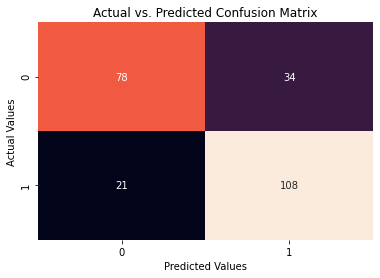

In [86]:
conf_mat = create_conf_mat(y_test, pred_dt)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Area under ROC curve

In [87]:
fpr_dt,tpr_dt,_=roc_curve(y_test,pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

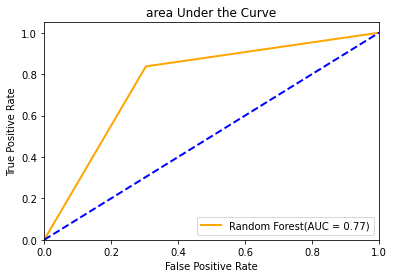

In [88]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Random Forest(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

# Model_2
# Random Forest Classifier

In [89]:
fit_rf = RandomForestClassifier(n_estimators=250)
fit_rf.fit(x_train, y_train)
pred_rf = fit_rf.predict(x_test)

In [90]:
print(pred_rf)

[1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1
 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1]


In [91]:
print(y_test)

[1, 0, 1, 1, 0, ..., 1, 0, 0, 0, 1]
Length: 241
Categories (2, int64): [0 < 1]


## Accuracy

In [92]:
accuracy_rf = fit_rf.score(x_test,y_test)
print("Here our Accuracy of model is: %0.5f"%accuracy_rf)

Here our Accuracy of model is: 0.80913


In [93]:
print(classification_report(y_test, pred_rf))


              precision    recall  f1-score   support

           0       0.78      0.81      0.80       112
           1       0.83      0.81      0.82       129

    accuracy                           0.81       241
   macro avg       0.81      0.81      0.81       241
weighted avg       0.81      0.81      0.81       241



### Accuracy comes out to be 81%

## Confusion matrix

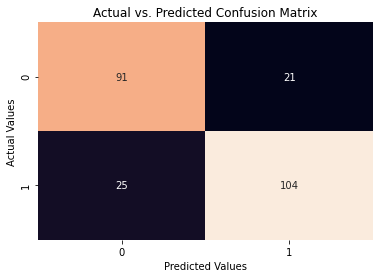

In [94]:
conf_mat = create_conf_mat(y_test, pred_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### Hyper_Parameter Optimization Using GridSearchCV

### Great things takes time so does GridSearchCV....Have patience

In [95]:
fit_rf_cv = RandomForestClassifier(random_state=5)

In [96]:
np.random.seed(5)

param_list = {'max_depth':[10,11,12,13,14,15,16],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(fit_rf_cv,cv=10,param_grid=param_list,n_jobs=3)
cv_rf.fit(x_train,y_train)

print('Best Parameters using Grid search: \n',cv_rf.best_params_)


Best Parameters using Grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto'}


### Fitting the best parameters into our random forest classifier

In [97]:
fit_rf_cv.set_params(bootstrap=False,criterion='entropy',max_features ='auto',max_depth = 15)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       random_state=5)

### OOB Rate : Cant be calculated as bootstrap = False

### Fitting the random forest classifier with desired n_estimator

In [117]:
fit_rf_cv.set_params(n_estimators=250,bootstrap=False,warm_start=False,oob_score=False)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       n_estimators=250, random_state=5)

### Train the random forest

In [118]:
fit_rf_cv.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       n_estimators=250, random_state=5)

## predictions

In [119]:
pred_rf_cv = fit_rf_cv.predict(x_test)

In [101]:
print(pred_rf_cv)

[1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1]


In [120]:
print(y_test)

[1, 0, 1, 1, 0, ..., 1, 0, 0, 0, 1]
Length: 241
Categories (2, int64): [0 < 1]


## Confusion Matrix

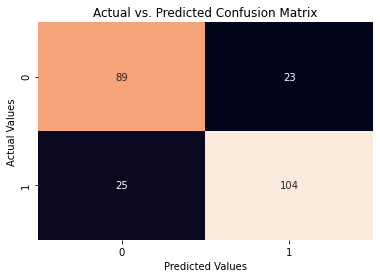

In [121]:
conf_mat = create_conf_mat(y_test, pred_rf_cv)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Accuracy

In [122]:
accuracy_rf_cv = fit_rf_cv.score(x_test,y_test)
print("Here our Accuracy of model is: %0.5f"%accuracy_rf_cv)

Here our Accuracy of model is: 0.80083


## Classification report

In [123]:
print(classification_report(y_test, pred_rf_cv))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       112
           1       0.82      0.81      0.81       129

    accuracy                           0.80       241
   macro avg       0.80      0.80      0.80       241
weighted avg       0.80      0.80      0.80       241



### Accuracy is close to 80% only even after hyper parameter optimization

## Area under ROC curve

In [106]:
fpr_rf,tpr_rf,_=roc_curve(y_test,pred_rf_cv)
roc_auc_rf = auc(fpr_rf,tpr_rf)

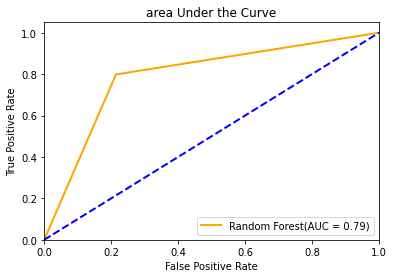

In [124]:
plt.figure(1)
lw=2
plt.plot(fpr_rf,tpr_rf,color='orange',lw=lw,label='Random Forest(AUC = %0.2f)'%roc_auc_rf)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")